In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import numpy.random as random
import time
import IPython

from scipy.integrate import quad

In [2]:
def U(r, sigma, a):
    return 4*sigma*((a/r)**12 - (a/r)**6)

In [3]:
sigma = 6.4087e-19
a = 6.60744e-11

In [4]:
r0 = a*np.power(2.0, 1.0/6.0)
D = sigma

In [5]:
r = np.linspace(r0*0.1, r0*3.0, 1000)
U_vals = U(r, sigma, a)

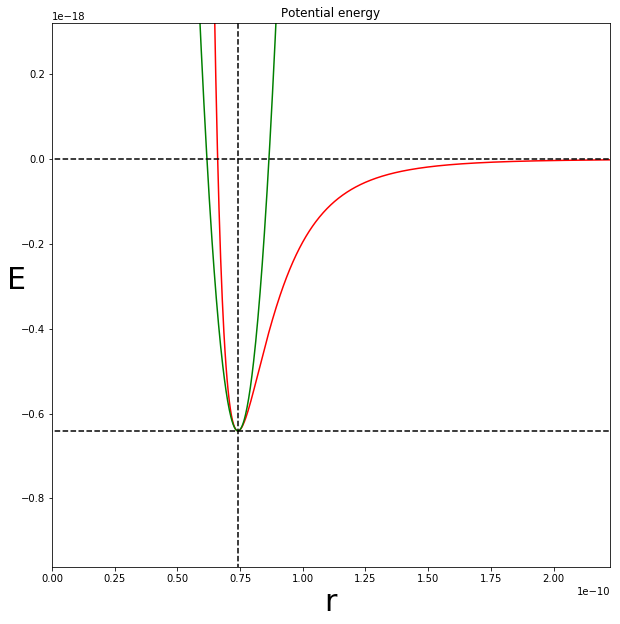

In [6]:
plt.figure(figsize=(10, 10))
plt.title("Potential energy")
plt.axis([0.0, 3*r0, -1.5*sigma, 0.5*sigma])
plt.xlabel("r", fontsize=30)
plt.ylabel("E", fontsize=30, rotation=0)

plt.plot(r, U_vals, 'r')


###
k = 36.0*np.power(2, 2.0/3.0)*sigma/(a*a)
r0 = r0

def paraboloid_U(r, k, r0, sigma):
    return k/2.0*(r - r0)*(r - r0) - sigma

U_par_vals = paraboloid_U(r, k, r0, sigma)
plt.plot(r, U_par_vals, 'g')
###

plt.plot([-10, 10], [0, 0], 'k--')
plt.plot([r0, r0], [-10, 10], 'k--')
plt.plot([-10, 10], [-D, -D], 'k--')

plt.show()

In [7]:
m = 1.6735640e-27
h_plank = 1.054837e-34

In [8]:
gamma = a/(np.pi*h_plank)*np.sqrt(m*sigma)
# gamma = 10.377
print(gamma)

def u(x):
    return 4.0*(1.0/np.power(x, 12.0) - 1.0/np.power(x, 6.0))

6.529863970427905


In [9]:
def integrate(f, x0, x1, h=0.001, args=None):
    res = 0.0
#     grid = np.arange(x0, x1, h)
    grid = np.arange(x0, x1, (x1 - x0)/1000.0)
    for i in range(len(grid) - 1):
        a = grid[i]
        b = grid[i + 1]
        res += (b - a) / 6.0 * (f(a, *args) + 4.0 * f((a + b) / 2.0, *args) + f(b, *args))
    return res

In [10]:
def integrand(x, epsilon, u):
    value = epsilon - u(x)
    return np.sqrt(value) if value >= 0.0 else 0.0


def f(epsilon, n, u, gamma):
    x1 = np.power(2.0/(1.0 + np.sqrt(1 + epsilon)), 1.0/6.0)
    x2 = np.power(2.0/(1.0 - np.sqrt(1 + epsilon)), 1.0/6.0)
    
    integral_value = quad(integrand, x1, x2, args=(epsilon, u))[0]
#     print("exp: " + str(integral_value))
    integral_value = integrate(integrand, x1, x2, h=0.001, args=(epsilon, u))
#     print("got: " + str(integral_value))
#     print()
    
    return gamma*integral_value - n - 0.5


def plot_n_state(n, epsilon_vals, f_vals, epsilon0):
    plt.figure(figsize=(7, 7))
    plt.title("f({:.5f}, {})=0".format(epsilon0, n))
    plt.xlabel("epsilon", fontsize=15)
    plt.ylabel("f", fontsize=15, rotation=0)
    
    plt.plot(epsilon_vals, f_vals, 'r')
    plt.plot([-1, 0], [0, 0], 'k--')
    plt.plot(epsilon0, 0, 'bo')
    
    plt.show()

n max = 5


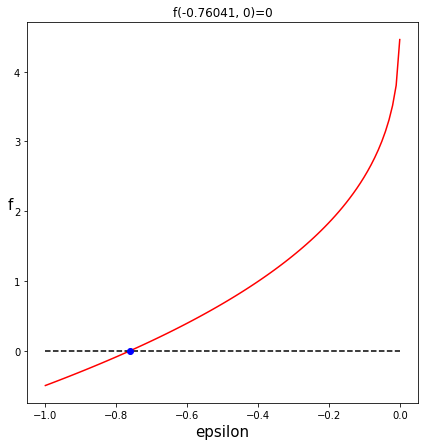

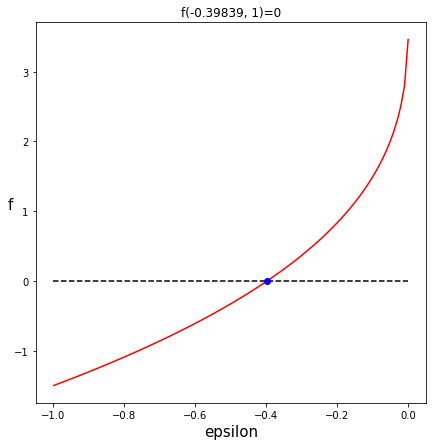

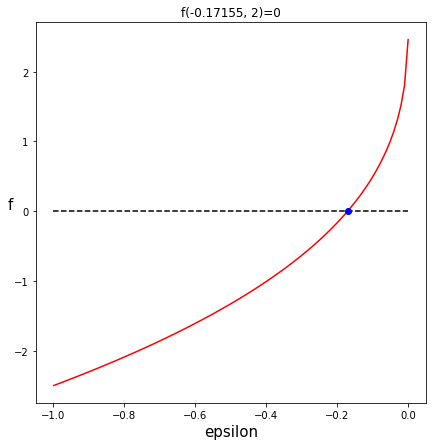

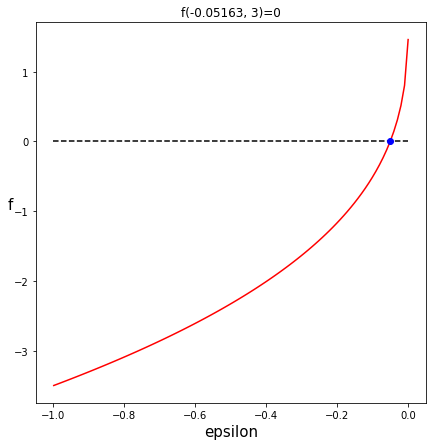

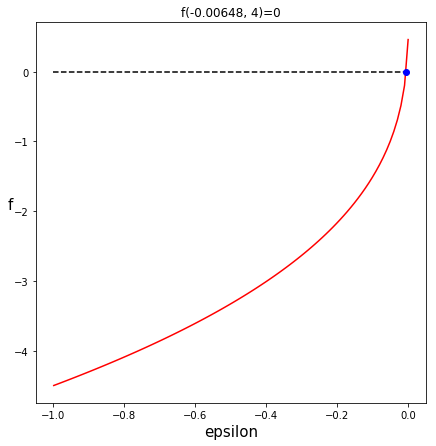

In [11]:
n_max = int(np.ceil(f(-1e-5, 0, u, gamma)))
epsilons = np.zeros(n_max, dtype=np.float64)
print("n max = " + str(n_max))

epsilon_vals = np.linspace(-1.0+1e-3, -1e-3, 100)
f0_vals = np.array([f(eps, 0, u, gamma) for eps in epsilon_vals])

for n in range(n_max):
    epsilon0 = sp.optimize.brenth(f, -1.0+1e-3, -1e-3, args=(n, u, gamma))
    plot_n_state(n, epsilon_vals, f0_vals - n, epsilon0)
    epsilons[n] = epsilon0
    

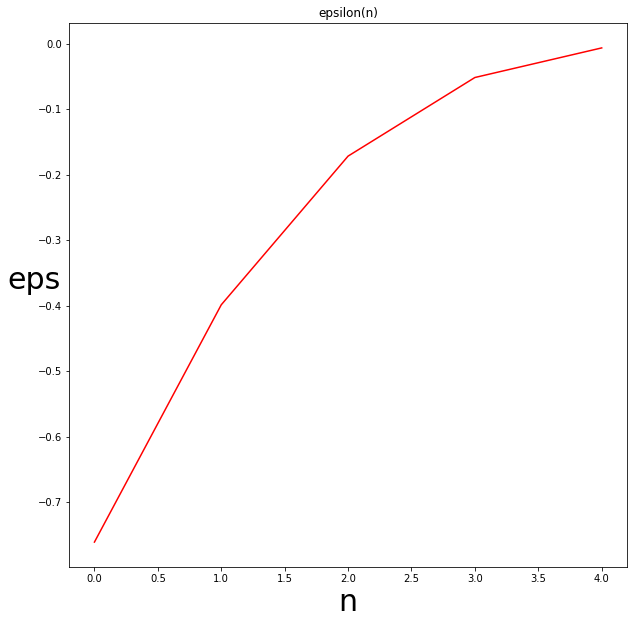

In [12]:
plt.figure(figsize=(10, 10))
plt.title("epsilon(n)")
plt.xlabel("n", fontsize=30)
plt.ylabel("eps", fontsize=30, rotation=0)

plt.plot(epsilons, 'r')

plt.show()

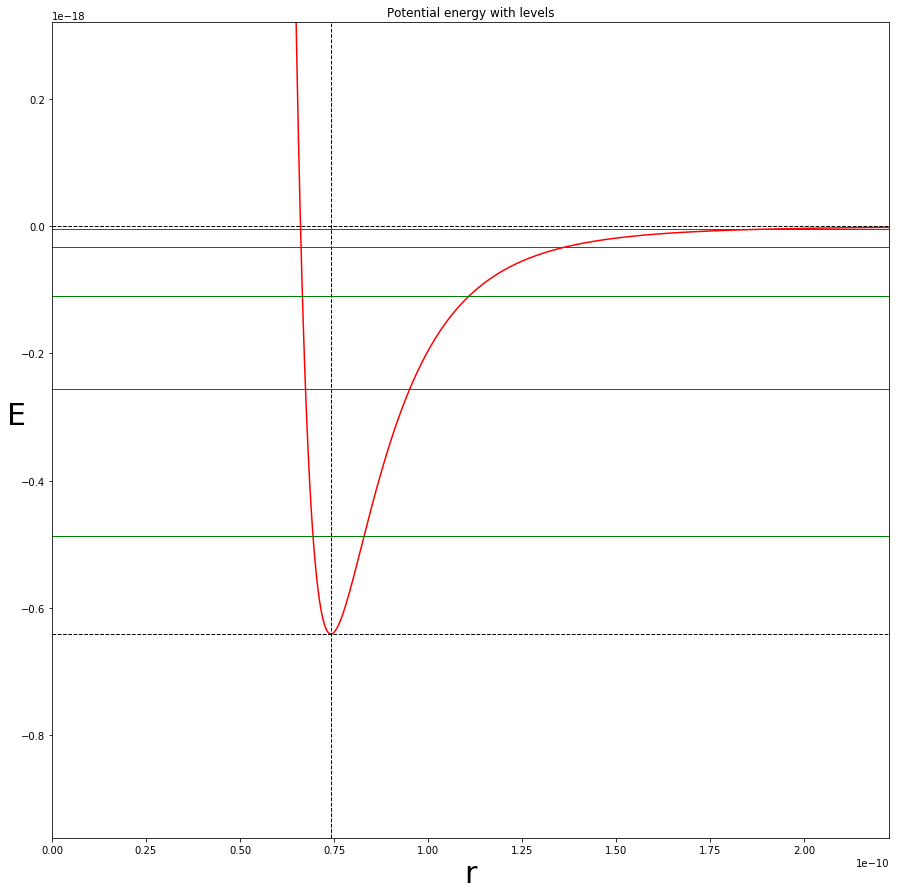

In [13]:
plt.figure(figsize=(15, 15))
plt.title("Potential energy with levels")
plt.axis([0.0, 3*r0, -1.5*sigma, 0.5*sigma])
plt.xlabel("r", fontsize=30)
plt.ylabel("E", fontsize=30, rotation=0)

plt.plot(r, U_vals, 'r')

plt.plot([-10, 10], [0, 0], 'k--', linewidth=1.0)
plt.plot([r0, r0], [-10, 10], 'k--', linewidth=1.0)
plt.plot([-10, 10], [-D, -D], 'k--', linewidth=1.0)

for eps in epsilons:
    En = eps*sigma
    plt.plot([-10, 10], [En, En], 'g', linewidth=1.0)

plt.show()

In [14]:
gamma = 1.0/np.pi
def u(y):
    return (y ** 2) / 4.0

In [15]:
def f(epsilon, n, u, gamma):
    x1 = -2.0*np.sqrt(epsilon)
    x2 = +2.0*np.sqrt(epsilon)
    integral_value = integrate(integrand, x1, x2, h=0.001, args=(epsilon, u))
    # integral_value = quad(integrand, x1, x2, args=(epsilon, u))[0]
    return gamma*integral_value - n - 0.5


def plot_n_state(n, epsilon_vals, f_vals, epsilon0):
    plt.figure(figsize=(7, 7))
    plt.title("f({:.5f}, {})=0".format(epsilon0, n))
    plt.xlabel("epsilon", fontsize=15)
    plt.ylabel("f", fontsize=15, rotation=0)
    
    plt.plot(epsilon_vals, f_vals, 'r')
    plt.plot([0, 10], [0, 0], 'k--')
    plt.plot(epsilon0, 0, 'bo')
    
    plt.show()

n max = 10


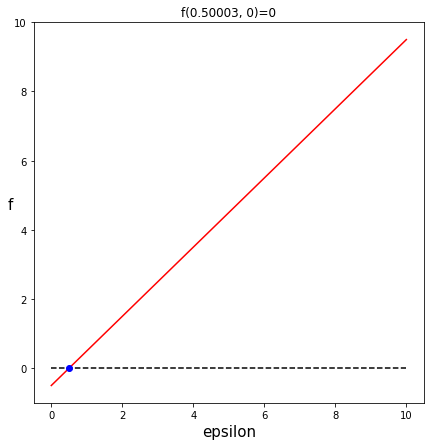

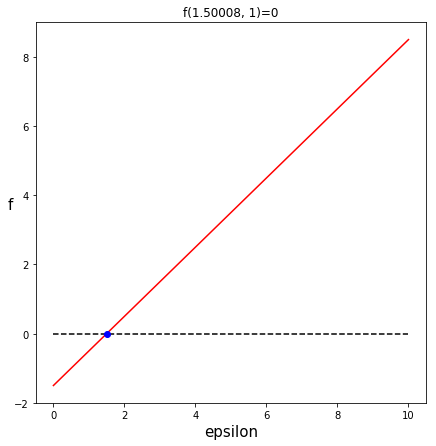

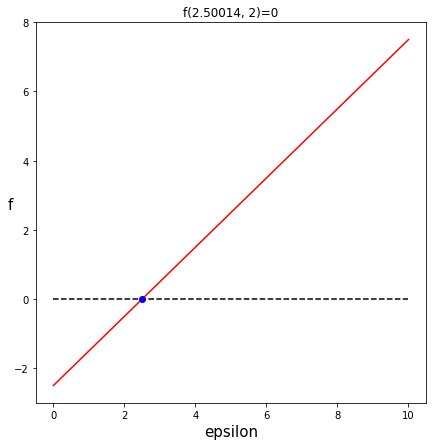

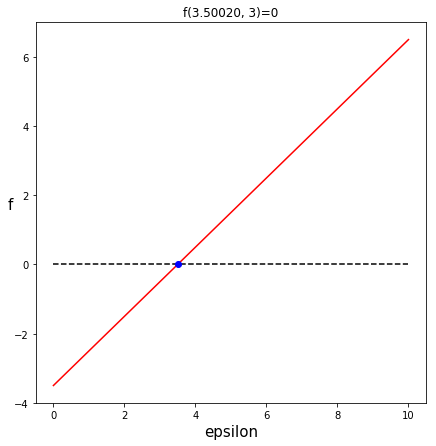

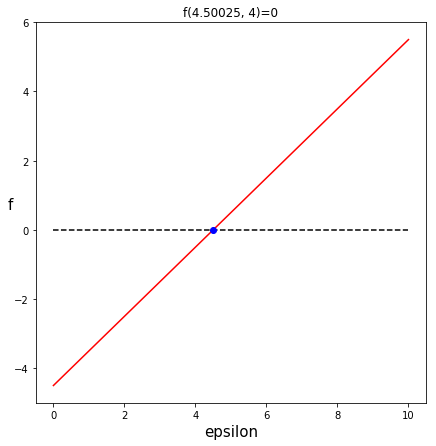

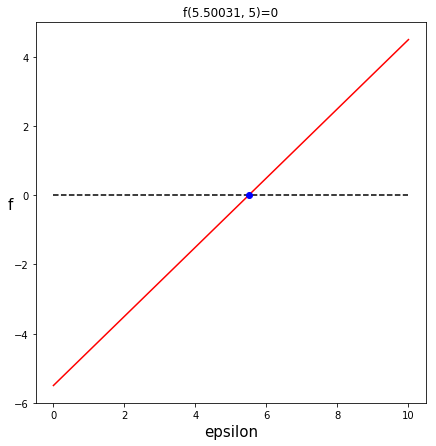

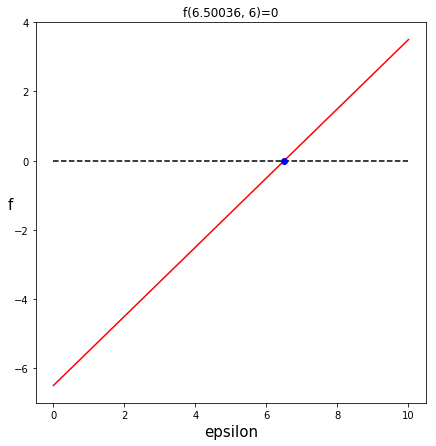

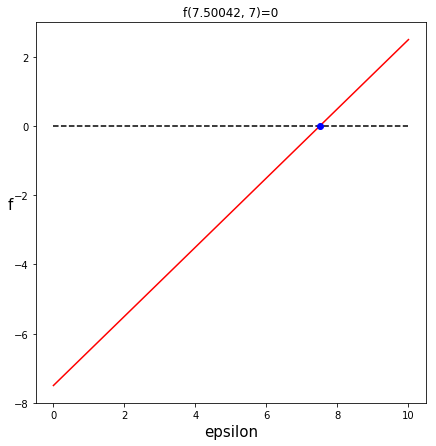

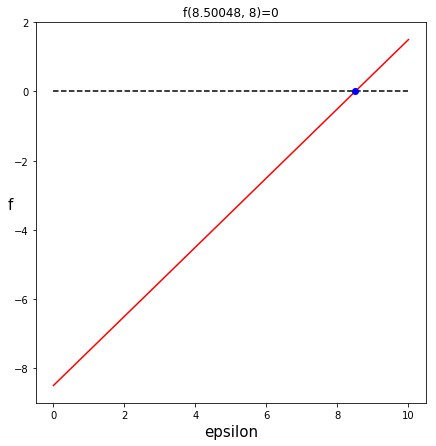

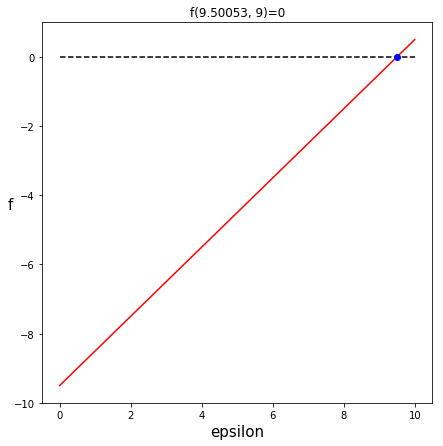

In [16]:
n_max=10
epsilons = np.zeros(n_max, dtype=np.float64)
print("n max = " + str(n_max))

epsilon_vals = np.linspace(0.0+1e-3, 10.0, 1000)
f0_vals = np.array([f(eps, 0, u, gamma) for eps in epsilon_vals])

for n in range(n_max):
    epsilon0 = sp.optimize.brenth(f, 0.0+1e-3, 1000, args=(n, u, gamma))
    plot_n_state(n, epsilon_vals, f0_vals - n, epsilon0)
    epsilons[n] = epsilon0

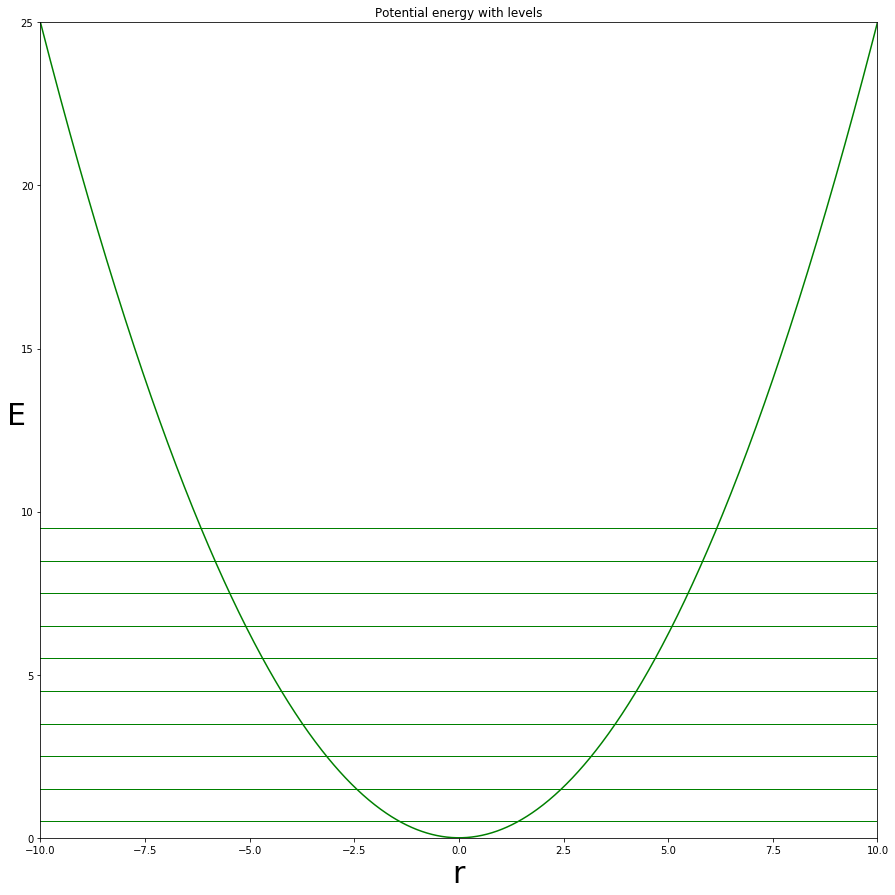

In [17]:
plt.figure(figsize=(15, 15))
plt.title("Potential energy with levels")
plt.axis([-10.0, 10.0, 0.0, 25.0])
plt.xlabel("r", fontsize=30)
plt.ylabel("E", fontsize=30, rotation=0)

k = 0.5
r0 = 0.0

def paraboloid_U(r, k, r0, sigma):
    return k/2.0*(r - r0)*(r - r0) - sigma

r = np.linspace(-10, 10, 1000)
U_par_vals = paraboloid_U(r, k, r0, sigma)
plt.plot(r, U_par_vals, 'g')

for eps in epsilons:
    En = eps
    plt.plot([-10, 10], [En, En], 'g', linewidth=1.0)

plt.show()